This notebook will serve as a example of how algorithm intelligence helps solving problems. 
We will take the simple example of the Sudoku and try to solve it using different techniques, from the simplest to the more advance ones. 

***backtracking***

***graph coloring***

***integer programming***

***reinforcement learning***

## creating a sudoku grid
First of all we need to create sudoku grid in a efficient and smart way: it will be a two-dimensional array. Then, for each method, a transformation will be made to fit to the current method. 



In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
from sudoku import Sudoku

In [3]:
test1 = Sudoku()

In [4]:
print(test1.grid)

[[0. 0. 6. 5. 3. 2. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 3. 0. 7.]
 [8. 0. 7. 0. 2. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 4. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 7. 6. 2. 0. 0.]
 [0. 8. 2. 0. 0. 0. 0. 0. 0.]]


In [5]:
counts = {}
for j in range(10,20):
    count = 0
    N_test = 100
    for i in range(N_test):
        test = Sudoku(n = j)
        count += test.count
    count /= N_test
    counts[j] = count

In [6]:
counts

{10: 4.73,
 11: 5.92,
 12: 11.63,
 13: 14.11,
 14: 20.66,
 15: 35.04,
 16: 78.67,
 17: 130.47,
 18: 169.35,
 19: 386.85}

## Backtracking
We will use backtracking to try to complete the Sudoku grid. At each new cell, we will try the first digit that can be added there and move to the next one and try to do the same for the next cell. If there is an issue, we backtrack and set a superior number in that cell.

We will use a stack to perform this. 

## Integer programming

In this section, I will use the pulp package. It is a linear/integer programming python package. 

In [7]:
test_IP = Sudoku()
result_IP = test_IP.complete_sudoku(method = "IP")


In [8]:
print(result_IP)

True


In [10]:
if result_IP == True:
    print(test_IP._solution)
    print(test_IP._time)

[[4. 2. 5. 7. 3. 9. 1. 8. 6.]
 [1. 3. 7. 5. 8. 6. 2. 4. 9.]
 [6. 8. 9. 2. 1. 4. 5. 3. 7.]
 [8. 5. 3. 6. 9. 2. 4. 7. 1.]
 [2. 9. 4. 1. 7. 8. 3. 6. 5.]
 [7. 1. 6. 3. 4. 5. 9. 2. 8.]
 [9. 7. 8. 4. 5. 3. 6. 1. 2.]
 [3. 6. 1. 9. 2. 7. 8. 5. 4.]
 [5. 4. 2. 8. 6. 1. 7. 9. 3.]]
0.05295062065124512


In [13]:
times = []
for i in tqdm(range(1000)):
    test = Sudoku()
    result = test.complete_sudoku(method = "IP")
    if result == True:
        times.append(test._time)

100%|██████████| 1000/1000 [02:23<00:00,  5.62it/s]


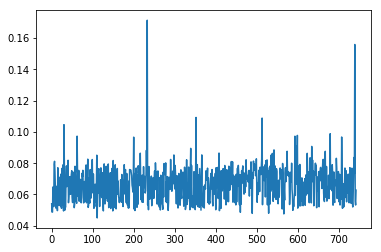

In [15]:
from matplotlib import pyplot as plt

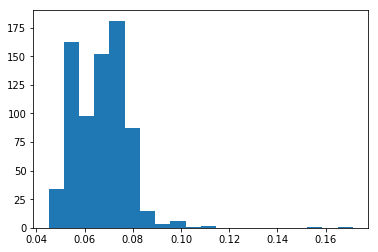

In [28]:
plt.hist(times, bins=20)
plt.show()

In [24]:
print("mean: " + str(np.mean(times)))
print("standard deviation: " + str(np.std(times)))
print("min: " + str(np.min(times)))
print("max: " + str(np.max(times)))

mean: 0.06682819793875734
standard deviation: 0.011469822077523886
min: 0.04503607749938965
max: 0.17132306098937988


## Reinforcement learning

In this section, I will use reinforcement learning to learn how to solve a Sudoku in a human fashion.